In [12]:
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
# for trian test and validation
from sklearn.model_selection import train_test_split

In [13]:
from google.colab import files

In [15]:
uploaded = files.upload()

Saving other.zip to other.zip


In [4]:
! pwd

/content


In [5]:
os.environ['KAGGLE_CONFICT_DIR']='/content'

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d tongpython/cat-and-dog

 98% 213M/218M [00:01<00:00, 225MB/s]
100% 218M/218M [00:01<00:00, 224MB/s]


In [10]:
! unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [16]:
! unzip other.zip

Archive:  other.zip
   creating: unsplash-images-collection/
  inflating: unsplash-images-collection/photo-1433162653888-a571db5ccccf.jpg  
  inflating: unsplash-images-collection/photo-1458571037713-913d8b481dc6.jpg  
  inflating: unsplash-images-collection/photo-1459255418679-d6424da9ee33.jpg  
  inflating: unsplash-images-collection/photo-1461800919507-79b16743b257.jpg  
  inflating: unsplash-images-collection/photo-1461896836934-ffe607ba8211.jpg  
  inflating: unsplash-images-collection/photo-1464695110811-dcf3903dc2f4.jpg  
  inflating: unsplash-images-collection/photo-1470058869958-2a77ade41c02.jpg  
  inflating: unsplash-images-collection/photo-1471086569966-db3eebc25a59.jpg  
  inflating: unsplash-images-collection/photo-1471897488648-5eae4ac6686b (1).jpg  
  inflating: unsplash-images-collection/photo-1471897488648-5eae4ac6686b.jpg  
  inflating: unsplash-images-collection/photo-1471899236350-e3016bf1e69e.jpg  
  inflating: unsplash-images-collection/photo-1485470733090-0aae17

In [27]:
#dataset path:
train_path=Path(r'/content/training_set/training_set')
test_path=Path(r'/content/test_set/test_set')

# file path for all pngs -> to list png [1.png,2.png,.....]
train_file=list(train_path.glob(r'**/*.jpg'))
test_file=list(test_path.glob(r'**/*.jpg'))

# lambda function to get labels of images
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_file))

# traing data path converted to pandas
train_file = pd.Series(train_file).astype(str)
print('train_file_path:',train_file)
print('\n')

train_labels = pd.Series(train_labels)
print('train_labels',train_labels)
print('\n')

df_train = pd.concat([train_file, train_labels], axis=1)
df_train.columns = ['image', 'label']
print(df_train.head())
print('\n')

# test data path converted to pandas
test_file = pd.Series(test_file).astype(str)
print('test_file_path:',test_file)
print('\n')

test_labels = pd.Series(test_labels)
print('test_labels',test_labels)
print('\n')

df_test = pd.concat([test_file,test_labels], axis=1)
df_test.columns = ['image', 'label']

train_file_path: 0       /content/training_set/training_set/cats/cat.22...
1       /content/training_set/training_set/cats/cat.12...
2       /content/training_set/training_set/cats/cat.23...
3       /content/training_set/training_set/cats/cat.23...
4       /content/training_set/training_set/cats/cat.36...
                              ...                        
8000    /content/training_set/training_set/dogs/dog.29...
8001    /content/training_set/training_set/dogs/dog.36...
8002    /content/training_set/training_set/dogs/dog.33...
8003    /content/training_set/training_set/dogs/dog.35...
8004    /content/training_set/training_set/dogs/dog.30...
Length: 8005, dtype: object


train_labels 0       cats
1       cats
2       cats
3       cats
4       cats
        ... 
8000    dogs
8001    dogs
8002    dogs
8003    dogs
8004    dogs
Length: 8005, dtype: object


                                               image label
0  /content/training_set/training_set/cats/cat.22...  cats
1  /content

In [25]:
# for other dataset
data_path=Path(r'/content/other')

# file path for all pngs -> to list png [1.png,2.png,.....]
data=list(data_path.glob(r'**/*.jpg'))

# lambda function to get labels of images
data_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], data))

# traing data path converted to pandas
data = pd.Series(data).astype(str)

data_labels = pd.Series(data_labels)

df_2 = pd.concat([data, data_labels], axis=1)
df_2.columns = ['image', 'label']
other_train,other_test=train_test_split(df_2,test_size=0.2,random_state=42)
df_2.head()

,image,label
0,/content/other/photo-1635951485250-9e6e54bb896...,other
1,/content/other/photo-1538883689728-2c32af36a31...,other
2,/content/other/photo-1634148529256-c4eea4b56aa...,other
3,/content/other/photo-1634226363964-98187a7e55c...,other
4,/content/other/photo-1626443330298-6954c60c256...,other


In [28]:
#add both dfs in single dataframe
df_train=df_train.append(other_train)

df_test=df_test.append(other_test)

In [20]:
type(other_train)

pandas.core.frame.DataFrame

In [29]:
print('training set:')
print(df_train.label.value_counts())

print('test set:')
df_test.label.value_counts()

training set:
dogs     4005
cats     4000
other     637
Name: label, dtype: int64
test set:


dogs     1012
cats     1011
other     160
Name: label, dtype: int64

In [30]:
df_train,df_val=train_test_split(df_train,test_size=0.2,random_state=42)
print('shape of training:',df_train.shape)
print('shape of validation:',df_val.shape)
print('shape of testing:',df_test.shape)

shape of training: (6913, 2)
shape of validation: (1729, 2)
shape of testing: (2183, 2)


In [31]:
image_data_generator = ImageDataGenerator(
      rescale = 1./255,#[0,1]
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'#padding
      )

In [38]:
train=image_data_generator.flow_from_dataframe(dataframe=df_train,x_col='image',y_col='label',class_mode='categorical',target_size=(200,200),color_mode='rgb',shuffle=False)
test=image_data_generator.flow_from_dataframe(dataframe=df_test,x_col='image',y_col='label',class_mode='categorical',target_size=(200,200),color_mode='rgb',shuffle=False)
val=image_data_generator.flow_from_dataframe(dataframe=df_val,x_col='image',y_col='label',class_mode='categorical',target_size=(200,200),color_mode='rgb',shuffle=False)


Found 6913 validated image filenames belonging to 3 classes.
Found 2183 validated image filenames belonging to 3 classes.
Found 1729 validated image filenames belonging to 3 classes.


In [32]:
input_shape = (200, 200, 3)

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)        0

In [39]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
217/217 [==============================] - 119s 496ms/step - loss: 2.0910 - accuracy: 0.4723 - val_loss: 0.8866 - val_accuracy: 0.5124
Epoch 2/50
217/217 [==============================] - 108s 496ms/step - loss: 0.8871 - accuracy: 0.5150 - val_loss: 0.9023 - val_accuracy: 0.5009
Epoch 3/50
217/217 [==============================] - 106s 490ms/step - loss: 0.8679 - accuracy: 0.5171 - val_loss: 0.8679 - val_accuracy: 0.5309
Epoch 4/50
217/217 [==============================] - 106s 489ms/step - loss: 0.8634 - accuracy: 0.5235 - val_loss: 0.8476 - val_accuracy: 0.5367
Epoch 5/50
217/217 [==============================] - 106s 487ms/step - loss: 0.8507 - accuracy: 0.5315 - val_loss: 0.8607 - val_accuracy: 0.5552
Epoch 6/50
217/217 [==============================] - 105s 486ms/step - loss: 0.8447 - accuracy: 0.5387 - val_loss: 0.8353 - val_accuracy: 0.5529
Epoch 7/50
217/217 [==============================] - 106s 487ms/step - loss: 0.8365 - accuracy: 0.5484 - val_loss: 0.8309 -

In [43]:
model.save('multiclassification-1.h5')

In [41]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

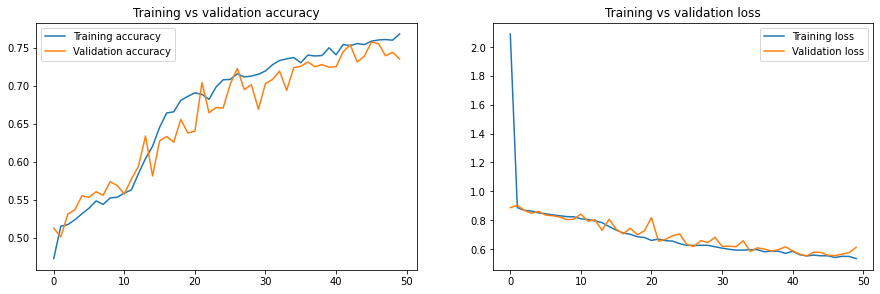

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [48]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample2.jpg')
	# load model
	model = load_model('multiclassification-1.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[0. 0. 1.]


In [ ]:
pred = model.predict(test)